In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.cross_decomposition import CCA

In [5]:
# Step 1: Simulate or Load Data
# Let's assume `connectivity_features` is an (n_samples, n_connectivity_features) matrix
# and `HAMD_17_responses` is an (n_samples, 17) matrix with each column being a depressive symptom.

# Replace this with actual data loading
n_samples = 100  # number of subjects
n_connectivity_features = 50  # number of connectivity features
n_symptoms = 1  # number of symptoms: GAD + Sleep + biological age

# Simulated data (replace with your actual data)
np.random.seed(42)
connectivity_features = np.random.rand(n_samples, n_connectivity_features)
HAMD_17_responses = np.random.randint(1, 5, size=(n_samples, n_symptoms))

# Step 2: Spearman's rank correlation for each feature against each symptom
# Store p-values and correlation coefficients
p_values = np.zeros((n_connectivity_features, n_symptoms))
correlation_coeffs = np.zeros((n_connectivity_features, n_symptoms))

for i in range(n_connectivity_features):
    for j in range(n_symptoms):
        rho, p_val = spearmanr(connectivity_features[:, i], HAMD_17_responses[:, j])
        correlation_coeffs[i, j] = rho
        p_values[i, j] = p_val

# Step 3: Select connectivity features with significant correlations (p < 0.005)
# Apply the significance threshold (you can also apply FDR correction if needed)
threshold = 0.005
significant_features = np.where(p_values < threshold)[0]
filtered_connectivity_features = connectivity_features[:, significant_features]

# Step 4: Apply(CCA)
# Define the CCA model with the number of components (can be less than min(n_connectivity_features, n_symptoms))
n_components = min(len(significant_features), n_symptoms)
cca = CCA(n_components=n_components)

# Fit the CCA model
cca.fit(filtered_connectivity_features, HAMD_17_responses)

# Transform the features and symptoms into their canonical representations
connectivity_canonical, symptoms_canonical = cca.transform(filtered_connectivity_features, HAMD_17_responses)

# Step 5: Output the low-dimensional representations
print("Canonical representations of connectivity features:")
print(connectivity_canonical)
print("\nCanonical representations of symptoms:")
print(symptoms_canonical)

Canonical representations of connectivity features:
[[-1.14763268]
 [-0.96336986]
 [ 1.20644517]
 [-1.5300426 ]
 [ 0.18658184]
 [ 0.93893345]
 [ 0.64174032]
 [-1.52495858]
 [ 0.87516451]
 [ 1.43602774]
 [-0.39654988]
 [ 0.8566046 ]
 [-0.93028434]
 [ 1.20854265]
 [-1.01776529]
 [ 1.05199833]
 [-1.56724191]
 [-0.7392588 ]
 [-0.06506018]
 [ 1.33319879]
 [-0.65648206]
 [-0.85480665]
 [ 1.39176082]
 [ 1.47120944]
 [-1.11165235]
 [ 1.0945315 ]
 [-1.08524655]
 [-1.01856216]
 [-0.00344321]
 [ 0.71595745]
 [ 1.32575099]
 [-1.05889445]
 [-1.39452706]
 [ 1.15007599]
 [-1.20397679]
 [ 0.86084709]
 [-1.20397219]
 [-0.91733456]
 [-1.57164068]
 [ 1.00608884]
 [ 0.16125373]
 [ 0.03436358]
 [-0.00975324]
 [-1.36497247]
 [ 0.10067567]
 [-0.38528515]
 [ 0.63998773]
 [ 1.04936008]
 [-1.50899626]
 [ 1.41782611]
 [-1.16337242]
 [ 1.23762048]
 [ 1.19331769]
 [-0.35224338]
 [ 0.85519016]
 [-0.72694033]
 [-0.87014888]
 [ 1.36315154]
 [ 0.63559658]
 [-1.07438571]
 [-0.23514278]
 [ 0.31632356]
 [-0.81139633]
 [-

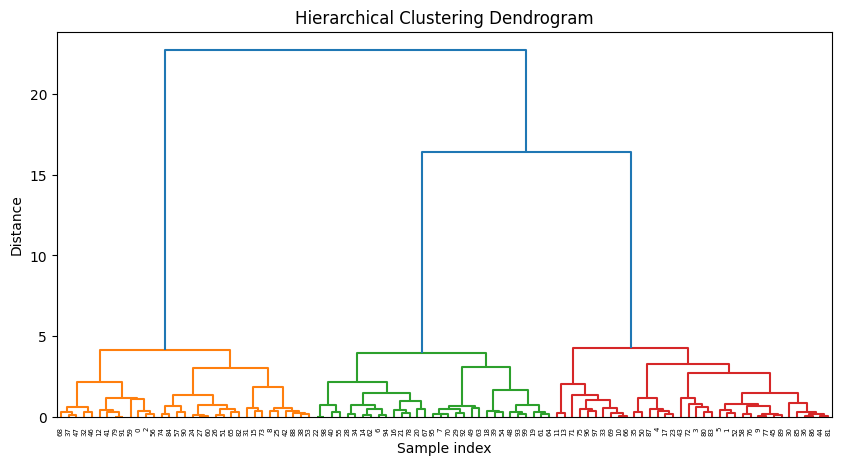

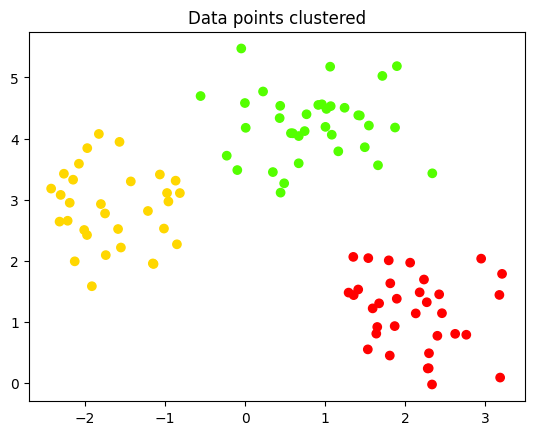

In [3]:
# Generate synthetic data (for demonstration)
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Step 1: Perform hierarchical clustering using linkage
Z = linkage(X, method='ward')  # 'ward' minimizes the variance between clusters

# Step 2: Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Step 3: Cutting the dendrogram to form clusters
# Choose a threshold distance at which to cut the dendrogram (you can adjust this value)
max_d = 7  # Adjust based on dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Step 4: Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')  # Plot points with cluster coloring
plt.title('Data points clustered')
plt.show()

In [27]:
from nilearn import datasets, plotting, image, input_data
import numpy as np

# Load Schaefer atlas (200-parcel version)
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=17)

# Assume functional data is preprocessed and stored as `func_data.nii.gz`
func_filename = 'path_to_your_func_data.nii.gz'

In [41]:
all_labels = [label.decode('utf-8') if isinstance(label, bytes) else label for label in schaefer['labels']]
unique_networks = set(label.split('_')[2] for label in all_labels)  # Adjust split index if needed
print("Unique networks in 17-network Schaefer Atlas:", unique_networks)

Unique networks in 17-network Schaefer Atlas: {'DefaultA', 'TempPar', 'LimbicB', 'DorsAttnA', 'SalVentAttnA', 'ContB', 'DefaultB', 'DefaultC', 'VisPeri', 'DorsAttnB', 'SomMotA', 'SalVentAttnB', 'ContC', 'SomMotB', 'ContA', 'VisCent', 'LimbicA'}


In [99]:
dmn_labels = [label for label in all_labels if 'Default' in label]
unique_dmn_networks = set(label.split('_')[2] for label in dmn_labels)  # Adjust split index if needed
dic_dmn_labels={}
for i in unique_dmn_networks:
    dic_dmn_labels[i] = [label for label in all_labels if i in label]
    print(f'N {i}: {len(dic_dmn_labels[i])}')
num_dmn = sum(len(v) for v in dic_dmn_labels.values())

N DefaultB: 10
N DefaultA: 7
N DefaultC: 4


In [101]:
limbic_labels = [label for label in all_labels if 'Limbic' in label]
unique_limbic_networks = set(label.split('_')[2] for label in limbic_labels)  # Adjust split index if needed
dic_limbic_labels={}
for i in unique_limbic_networks:
    dic_limbic_labels[i] = [label for label in all_labels if i in label]
    print(f'N {i}: {len(dic_limbic_labels[i])}')
num_limbic = sum(len(v) for v in dic_limbic_labels.values())

N LimbicB: 2
N LimbicA: 3


In [102]:
salVentAttn_labels = [label for label in all_labels if 'SalVentAttn' in label]
unique_salVentAttn_networks = set(label.split('_')[2] for label in salVentAttn_labels)  # Adjust split index if needed
dic_salVentAttn_labels={}
for i in unique_salVentAttn_networks:
    dic_salVentAttn_labels[i] = [label for label in all_labels if i in label]
    print(f'N {i}: {len(dic_salVentAttn_labels[i])}')
num_salVentAttn = sum(len(v) for v in dic_salVentAttn_labels.values())

N SalVentAttnB: 5
N SalVentAttnA: 9


In [103]:
cont_labels = [label for label in all_labels if 'Cont' in label]
unique_cont_networks = set(label.split('_')[2] for label in cont_labels)  # Adjust split index if needed
dic_cont_labels={}
for i in unique_cont_networks:
    dic_cont_labels[i] = [label for label in all_labels if i in label]
    print(f'N {i}: {len(dic_cont_labels[i])}')
num_cont = sum(len(v) for v in dic_cont_labels.values())

N ContA: 6
N ContC: 5
N ContB: 5


In [104]:
print(f'N nodes of interesting networks: {num_dmn + num_limbic + num_salVentAttn + num_cont}')

N nodes of interesting networks: 56


In [108]:
import math
math.comb(10,2)

45

In [57]:
16+15-24



7

In [61]:
9-16+24

17

In [62]:
20-16

4

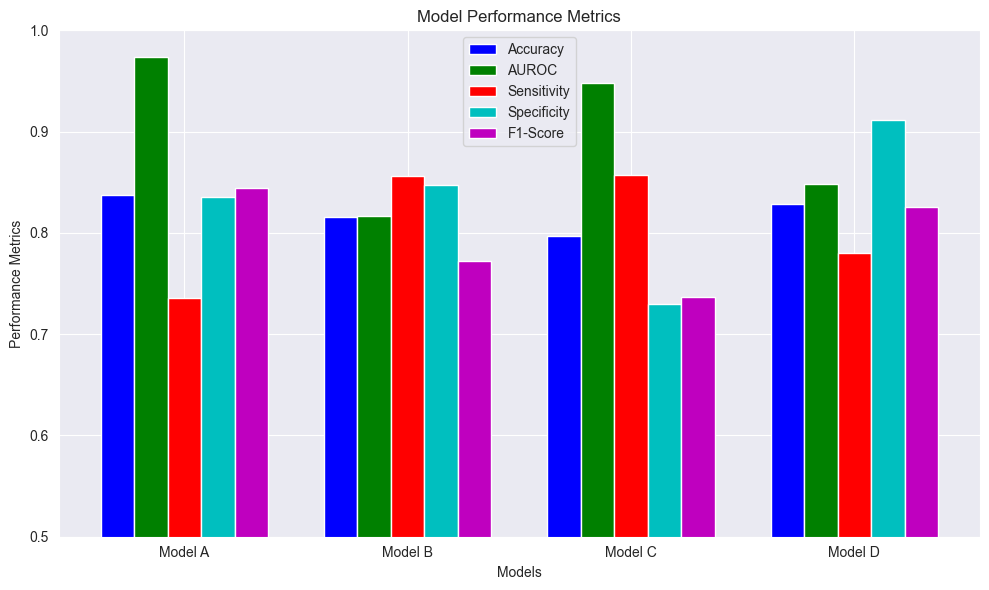

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data for performance metrics
models = ['Model A', 'Model B', 'Model C', 'Model D']
accuracy = np.random.uniform(0.75, 0.95, len(models))  # Simulated accuracy values
auroc = np.random.uniform(0.8, 0.98, len(models))      # Simulated AUROC values
sensitivity = np.random.uniform(0.7, 0.9, len(models)) # Simulated sensitivity values
specificity = np.random.uniform(0.7, 0.95, len(models))# Simulated specificity values
f1_score = np.random.uniform(0.65, 0.9, len(models))   # Simulated F1-score values

# Set up bar positions
x = np.arange(len(models))
bar_width = 0.15

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - 2 * bar_width, accuracy, bar_width, label='Accuracy', color='b')
plt.bar(x - bar_width, auroc, bar_width, label='AUROC', color='g')
plt.bar(x, sensitivity, bar_width, label='Sensitivity', color='r')
plt.bar(x + bar_width, specificity, bar_width, label='Specificity', color='c')
plt.bar(x + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='m')

# Add labels, legend, and title
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Performance Metrics')
plt.title('Model Performance Metrics')
plt.ylim(0.5, 1.0)  # Metrics typically range from 0 to 1
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


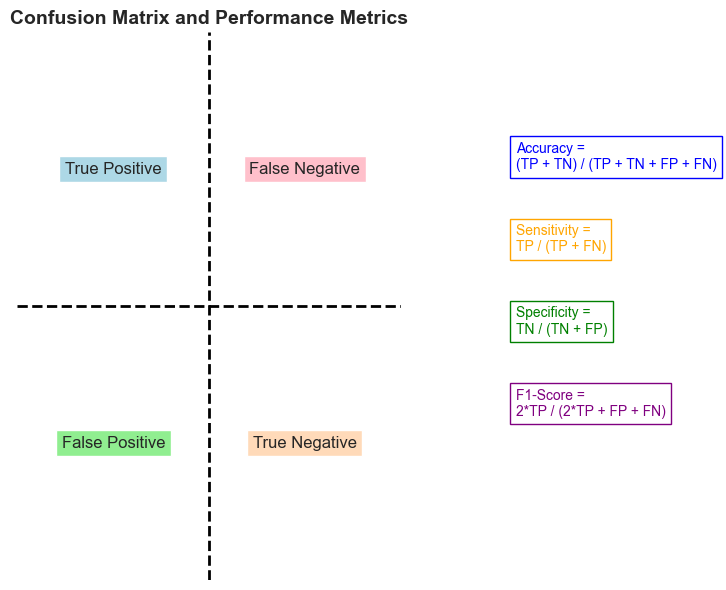

In [111]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw grid lines and label sections
# Add True Positive (TP), False Positive (FP), False Negative (FN), True Negative (TN)
ax.text(0.25, 0.75, 'True Positive', fontsize=12, ha='center', va='center', bbox=dict(facecolor='lightblue'))
ax.text(0.75, 0.75, 'False Negative', fontsize=12, ha='center', va='center', bbox=dict(facecolor='pink'))
ax.text(0.25, 0.25, 'False Positive', fontsize=12, ha='center', va='center', bbox=dict(facecolor='lightgreen'))
ax.text(0.75, 0.25, 'True Negative', fontsize=12, ha='center', va='center', bbox=dict(facecolor='peachpuff'))

# Draw outer and inner grid lines for the confusion matrix
for x in [0.5]:
    ax.axvline(x=x, color='black', linestyle='--', lw=2)
    ax.axhline(y=x, color='black', linestyle='--', lw=2)

# Add performance metric formulas outside of the matrix
metric_positions = [(1.3, 0.75), (1.3, 0.6), (1.3, 0.45), (1.3, 0.3)]
metrics = [
    ("Accuracy = \n(TP + TN) / (TP + TN + FP + FN)", 'blue'),
    ("Sensitivity = \nTP / (TP + FN)", 'orange'),
    ("Specificity = \nTN / (TN + FP)", 'green'),
    ("F1-Score = \n2*TP / (2*TP + FP + FN)", 'purple'),
]

for pos, (text, color) in zip(metric_positions, metrics):
    ax.text(*pos, text, fontsize=10, color=color, ha='left', bbox=dict(facecolor='white', edgecolor=color))

# Adjust axis and display
ax.axis('off')  # Hide axis
plt.title('Confusion Matrix and Performance Metrics', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
